In [10]:
from StochasticProcesses import *
import scipy.stats as sp

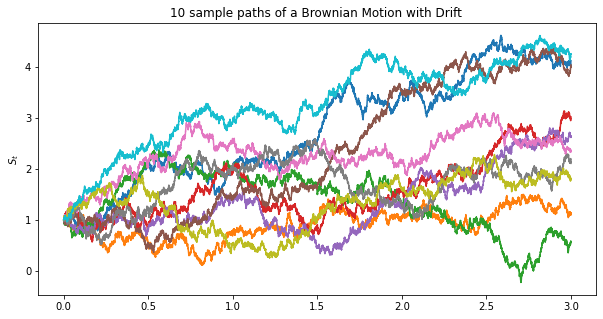

In [11]:
bm = BrownianMotionWithDrift(T=3, x0=1, mu=0.5, sigma=0.8)
bm.plotPaths(nPaths=10)

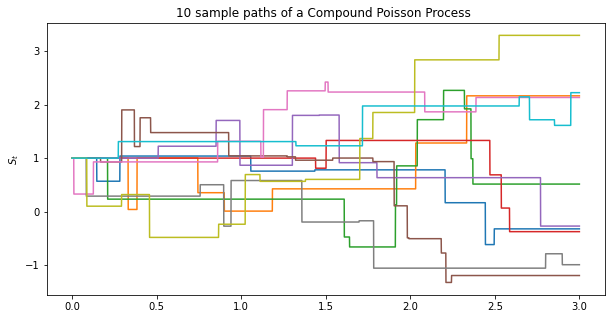

In [12]:
cp = CompoundPoissonProcess(lam=3, T=3, x0=1, jumpSizeRV=sp.uniform(loc=-1, scale=2))
cp.plotPaths(nPaths=10)

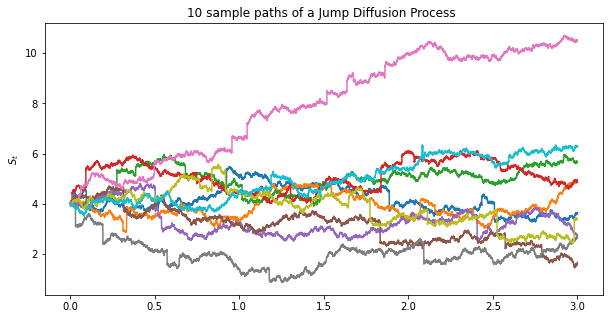

In [13]:
jd = JumpDiffusionProcess(bm, cp, x0=2)
jd.plotPaths(nPaths=10)

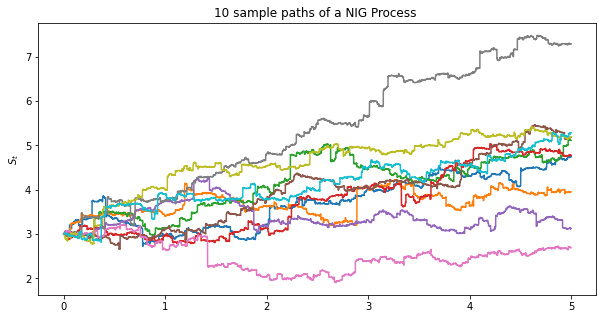

In [14]:
nig = NIGProcess(T=5, x0=3, nSteps=20000, theta=0.3, sigma=0.5, kappa=0.2)
nig.plotPaths(nPaths=10)